<a href="https://colab.research.google.com/github/omniaahmed55/ML/blob/main/student_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hopesb_student_depression_dataset_path = kagglehub.dataset_download('hopesb/student-depression-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/kaggle/input/student-depression-dataset/Student Depression Dataset.csv')

In [ ]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
data.shape

(27901, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [ ]:
print(data.mode().iloc[0])

id                                                       2
Gender                                                Male
Age                                                   24.0
City                                                Kalyan
Profession                                         Student
Academic Pressure                                      3.0
Work Pressure                                          0.0
CGPA                                                  8.04
Study Satisfaction                                     4.0
Job Satisfaction                                       0.0
Sleep Duration                           Less than 5 hours
Dietary Habits                                   Unhealthy
Degree                                            Class 12
Have you ever had suicidal thoughts ?                  Yes
Work/Study Hours                                      10.0
Financial Stress                                       5.0
Family History of Mental Illness                        

In [ ]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [ ]:
data=data.drop('Financial Stress Category', axis=1)
data.head()


KeyError: "['Financial Stress Category'] not found in axis"

In [ ]:
data.drop('Financial Stress ', axis=1, inplace=True, errors='ignore')


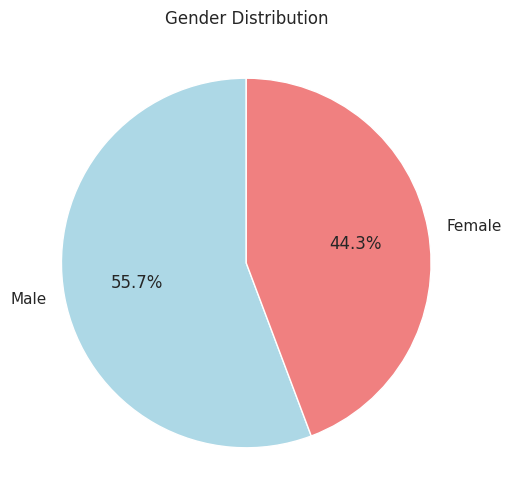

In [ ]:
sns.set(style="whitegrid")

# Gender Distribution (Pie Chart)
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

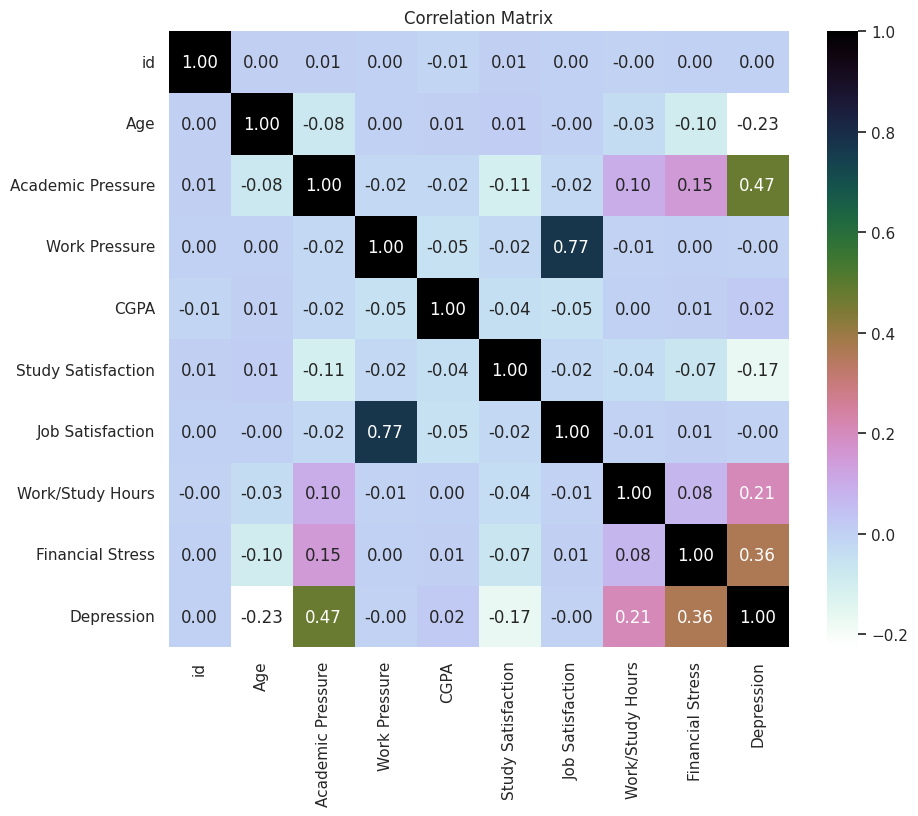

In [ ]:
#  Correlation Analysis (only numerical columns)
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()  # Calculate the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Outliers detected in columns:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Work/Study Hours
Depression


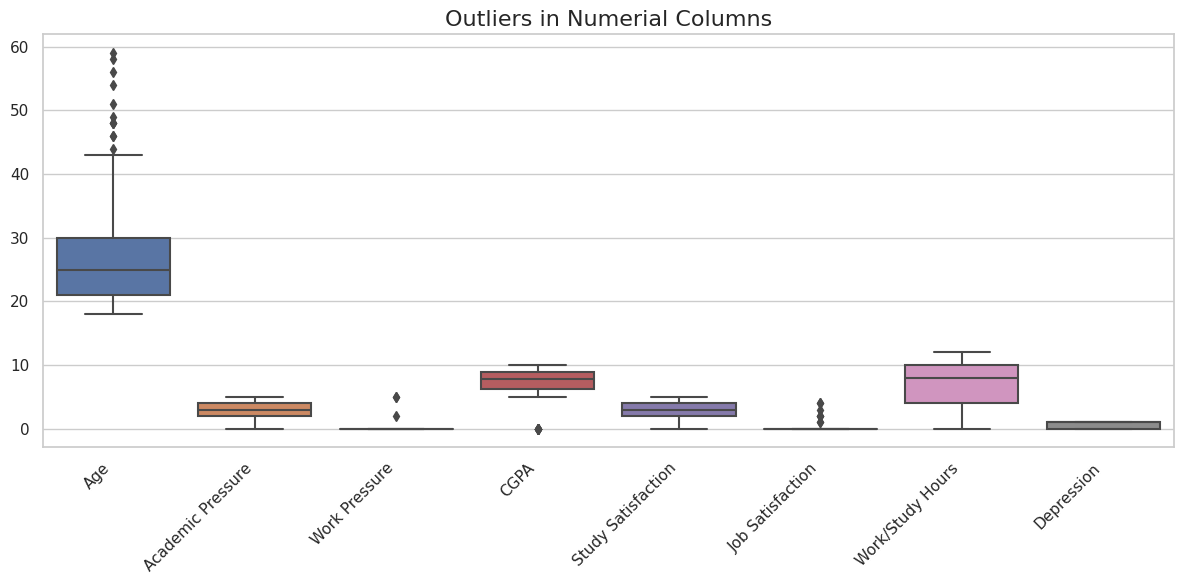

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']  # Exclude 'id
# Step 2: Outlier Detection using IQR method
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
numerical_outliers = detect_outliers_iqr(data, numerical_columns)
print(f"Outliers detected in columns:")
for col, outlier_data in numerical_outliers.items():
    print(col)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])  # Only numerical columns excluding 'id'
plt.title('Outliers in Numerial Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
data = data.drop('Financial Stress', axis=1, errors='ignore')

data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,No,0


In [ ]:
scaler=StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)


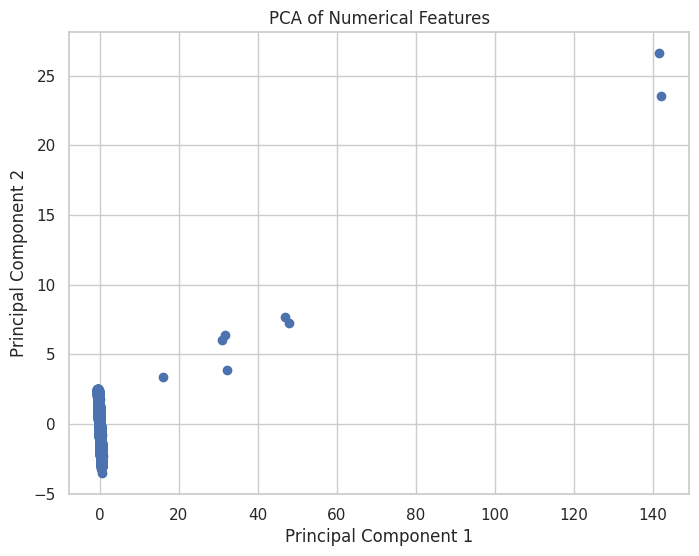

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Numerical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


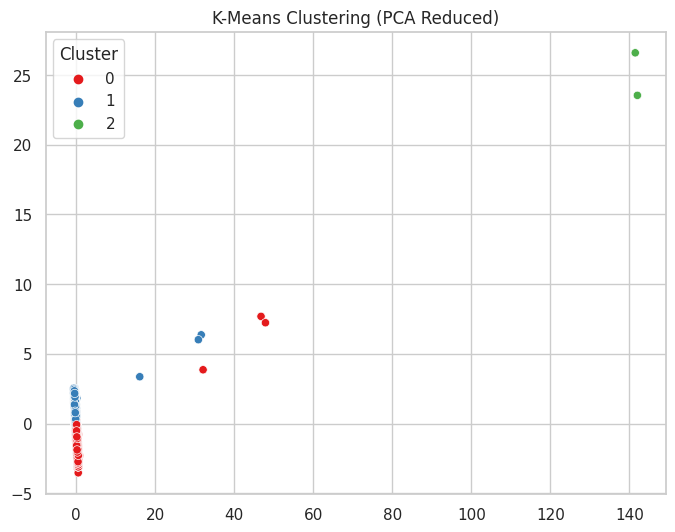

In [ ]:
kmeans= KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering (PCA Reduced)')
plt.show()

In [ ]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression,Cluster
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,No,1,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,Yes,0,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,Yes,0,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,Yes,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,No,0,0


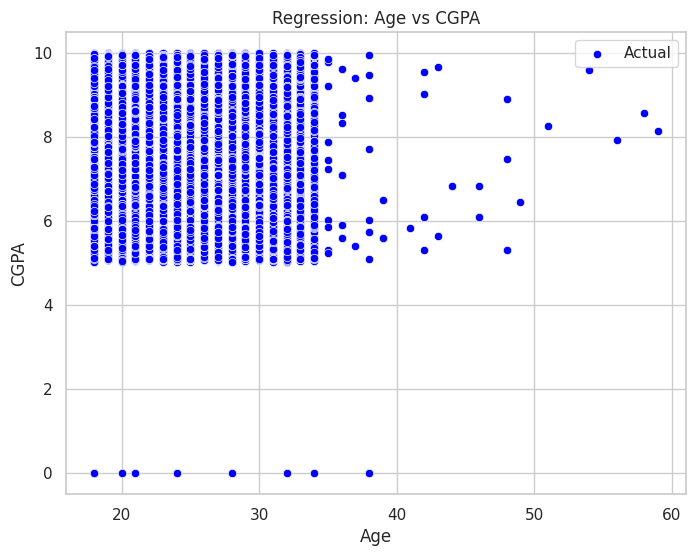

In [ ]:
x = data[['Age', 'Work Pressure']]
y=data['CGPA']
model = LinearRegression()
model.fit(x, y)

# Make predictions
predictions = model.predict(x)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='CGPA', data=data, color='blue', label='Actual')
plt.title('Regression: Age vs CGPA')
plt.show()

In [ ]:
data = data.drop(columns =  ['id', 'Degree', 'Profession','Work Pressure','City'])
data.shape

In [ ]:
data = data.drop('Cluster', axis=1)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
3,0,28.0,3.0,5.59,2.0,0.0,7.5,1,1,4.0,1,1
4,0,25.0,4.0,8.13,3.0,0.0,5.5,1,1,1.0,0,0
5,1,29.0,2.0,5.70,3.0,0.0,NaN,0,0,4.0,0,0
6,1,30.0,3.0,9.54,4.0,0.0,7.5,0,0,1.0,0,0
7,0,30.0,2.0,8.04,4.0,0.0,NaN,3,0,0.0,1,0


In [ ]:
def convert_to_numeric(value):
    if 'Less than' in value:
        return 4  # Assign 4 hours for "Less than 5 hours"
    elif 'More than' in value:
        return 9  # Assign 9 hours for "More than 8 hours"
    elif 'to' in value:
        return 6.5  # Assign average of 5-8 hours for "5 to 8 hours"
    return None  # Handle any other cases

# Apply the function to your data
numeric_data = [convert_to_numeric(val) for val in data]
print(numeric_data)

[None, None, None, None, None, None, None, None, None, None, 6.5, None, None]


In [ ]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:

# Apply LabelEncoder to the 'Gender' column
data['Dietary Habits'] = label_encoder.fit_transform(data['Dietary Habits'])

In [ ]:
data['Family History of Mental Illness'] = label_encoder.fit_transform(data['Family History of Mental Illness'])

In [ ]:
data['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(data['Have you ever had suicidal thoughts ?'])

In [ ]:
x = data.drop(['Depression','Sleep Duration'], axis=1)  # Drop 'Depression' column from the DataFrame
y = data['Depression']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)
X_train.head()

Gender                                     int64
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Dietary Habits                             int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Family History of Mental Illness           int64
dtype: object


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness
26049,1,34.0,2.0,8.17,4.0,0.0,0,0,9.0,0
20528,1,23.0,5.0,5.74,2.0,0.0,1,1,10.0,1
15400,1,27.0,4.0,5.32,1.0,0.0,0,1,8.0,0
15002,1,33.0,3.0,6.99,4.0,0.0,3,1,11.0,1
24417,0,30.0,0.0,5.47,2.0,0.0,3,1,5.0,0


In [ ]:
#  Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      2402
           1       0.82      0.86      0.84      3178

    accuracy                           0.81      5580
   macro avg       0.81      0.80      0.80      5580
weighted avg       0.81      0.81      0.81      5580



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[1785  617]
 [ 451 2727]]


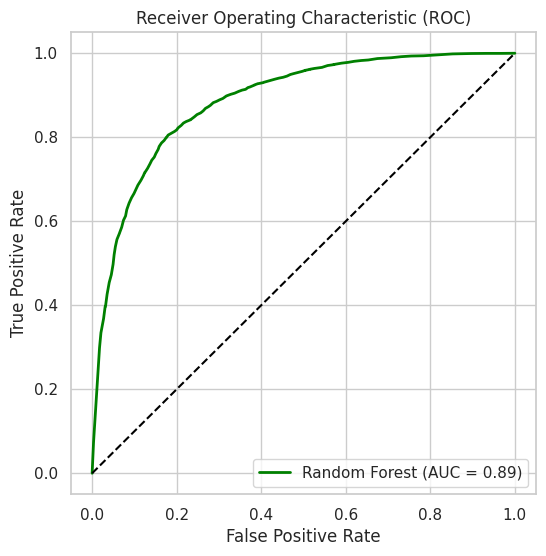

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

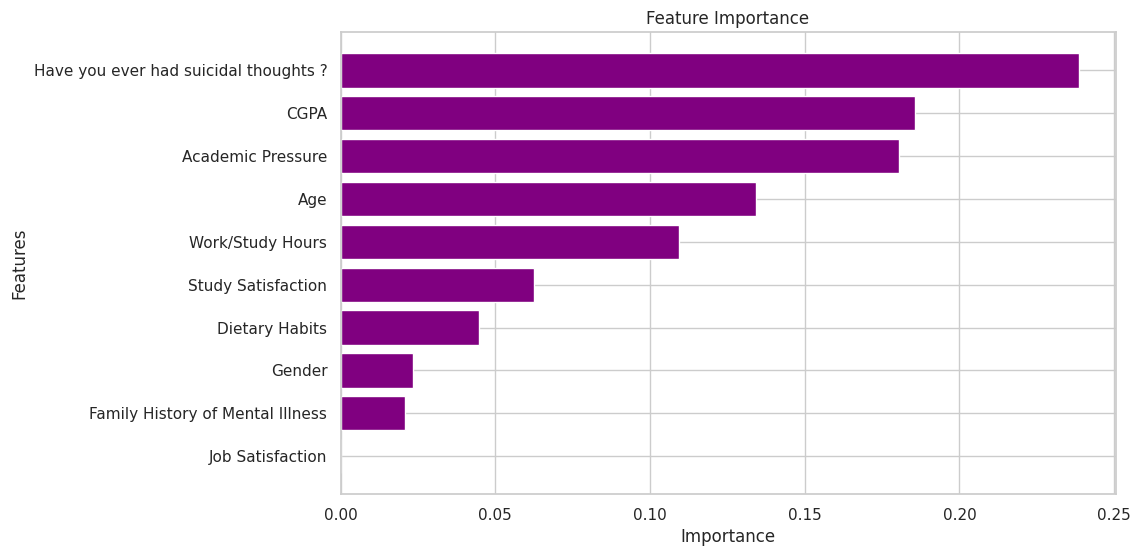

In [ ]:
importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order for readability
plt.show()